# FGGLIB Introduction

Factor graph grammars (FGG) are hyperedge replacement grammar that generate factor graphs.  <br>
They overcome the limitation that factor graphs have fixed structures, allow tractable inferences in many cases and can be useful to represent context free grammars - especially for probabilistic context free grammar which can generate more than one parse tree.  <br>
<br>
David Chiang and Riley present factor graph grammars and algorithms for conjunction of and inference on them in their work Factor Graph Grammar.  <br>
As part of the course project of Advanced Formal Language Theory, we have implemented the algorithms in a library called FGGLIB. <br>
FGGLIB is a Python library that contains functions presented in the paper and includes tests on a representative set of FGG examples.

***

### Installation

To install and use this library, download the source code and run _pip install -e ._ in the top directory.  <br>
In order to run all packages we recommend to use Python 3.10 and pip 21.

*** 

## Hypergraph

First, we will start with building a basic hypergraph that consists of labeled vertices and edges. <br>
We use a graph presented on <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Directed_hypergraph_example.svg/330px-Directed_hypergraph_example.svg.png">Wikipedia</a> as an example of our hypergraph that has six vertices and five edges as provided below. The elements of vertices and edges can be anything. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Directed_hypergraph_example.svg/330px-Directed_hypergraph_example.svg.png" width="130"/> <br>

In [1]:
from fgglib.fg.hypergraph import Hypergraph
from fgglib.fg.vertex import Vertex
from fgglib.fg.edge import Edge

hypergraph = Hypergraph()
vertex1 = Vertex('V1','v1')
vertex2 = Vertex('V2','v2')
vertex3 = Vertex('V3','v3')
vertex4 = Vertex('V4','v4')
vertex5 = Vertex('V5','v5')
vertex6 = Vertex('V6','v6')

edge1 = Edge(('V1, V2'),'e1')
edge2 = Edge({'V2, V3'},'e2')
edge3 = Edge({'V1, V3'},'e3')
edge4 = Edge({'V2, V3, V4, V5'},'e4')
edge5 = Edge({'V3', 'V5', 'V6'},'e5')

hypergraph.add_vertex(vertex1)
hypergraph.add_vertex(vertex2)
hypergraph.add_vertex(vertex3)
hypergraph.add_vertex(vertex4)
hypergraph.add_vertex(vertex5)
hypergraph.add_vertex(vertex6)

hypergraph.add_edge(edge1)
hypergraph.add_edge(edge2)
hypergraph.add_edge(edge3)
hypergraph.add_edge(edge4)
hypergraph.add_edge(edge5)

edge1.add_target(vertex1)
edge1.add_target(vertex2)
edge2.add_target(vertex2)
edge2.add_target(vertex3)
edge3.add_target(vertex1)
edge3.add_target(vertex3)
edge4.add_target(vertex2)
edge4.add_target(vertex3)
edge4.add_target(vertex4)
edge4.add_target(vertex5)
edge5.add_target(vertex3)
edge5.add_target(vertex5)
edge5.add_target(vertex6)

print(hypergraph.V)
print(hypergraph.E)

{Vertex: v3, Vertex: v6, Vertex: v2, Vertex: v5, Vertex: v4, Vertex: v1}
{Edge e4: [Vertex: v2, Vertex: v3, Vertex: v4, Vertex: v5], Edge e3: [Vertex: v1, Vertex: v3], Edge e1: [Vertex: v1, Vertex: v2], Edge e5: [Vertex: v3, Vertex: v5, Vertex: v6], Edge e2: [Vertex: v2, Vertex: v3]}


***

## Factor Graph

Factor graphs are probabilistic models which can be described as hypergraphs. They consist of variables, which are identical properties of the graph nodes and factors, a property of the hyperedges. These factors can be associated with some function and used to calculate a probability for a given variable assignment. <br>
FGGLIB also enables usage of different semirings which was adapted from rayuela library. For simplicity, the same notation was used.<br>
<br>
We use example 3 from the paper to generate factor graph with the same notation. Vertices are drawn in circle and edges in rectangles connecting the vertices. <br> <br>
 <img src="images/fg_exp3.png" width="450"/> <br>

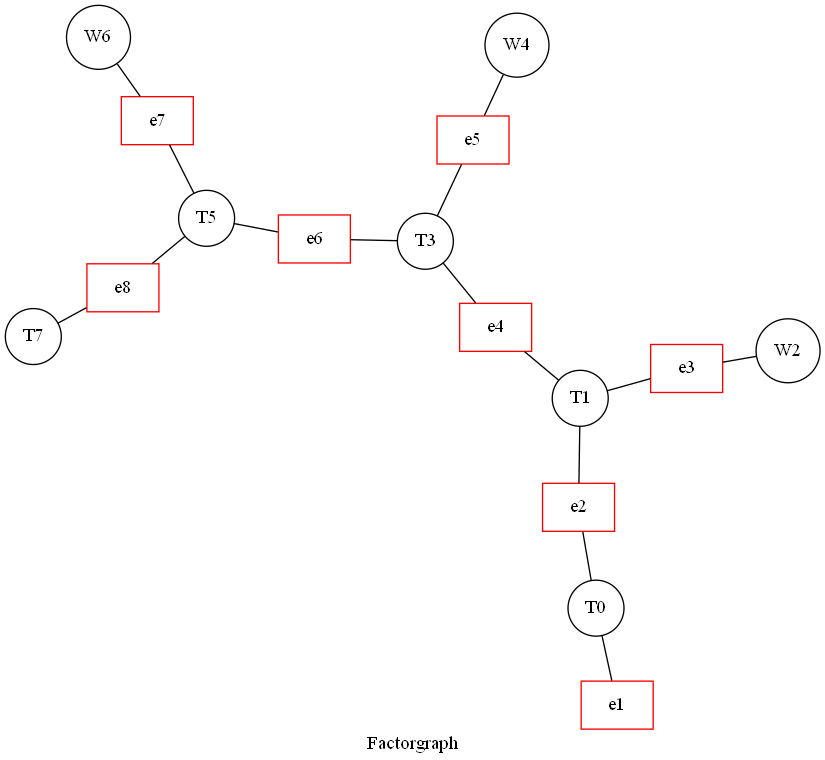

In [2]:
from fgglib.fg.factorgraph import Factorgraph
from fgglib.base.semiring import Real
from fgglib.fg.functions.discretedensity import DiscreteDensity
from IPython.display import Image
from fgglib.presentation.visualization import Visualization

fg = Factorgraph(Real)
vertexSet = ('T0','T1','W2','T3','W4','T5','W6','T7')

fg.createVertices(None, vertexSet, Real)

fg.createEdge('BOS','e1', {'T0'}, None, Real)
fg.createEdge('T1|T0','e2', {'T0','T1'}, None, Real)
fg.createEdge('W2|T1','e3', {'T1','W2'}, None, Real)
fg.createEdge('T3|T1','e4', {'T1','T3'}, None, Real)
fg.createEdge('W4|T3','e5', {'T3','W4'}, None, Real)
fg.createEdge('T5|T3','e6', {'T3','T5'}, None, Real)
fg.createEdge('W6|T5','e7', {'T5','W6'}, None, Real)
fg.createEdge('T7|T5','e8', {'T5','T7'}, None, Real)

imgname="Factorgraph"
Visualization().draw(fg, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

A factor graph has a function F that maps edge labels to functions. <br>
FGGLIB provides three different function types: 
- circuit
- discrete density
- normal density functions. 

Below we use discrete density with numerical values to  calculate marginals.

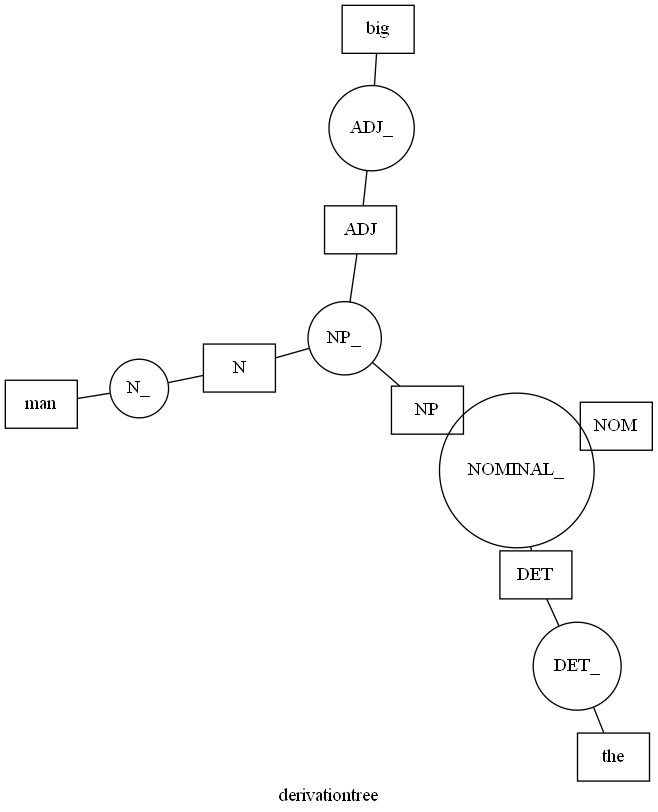

In [3]:
from fgglib.fgg.fgg import FGG
from fgglib.fgg.production import Production
from fgglib.fg.fragment import Fragment
frag=Fragment()

nominal = frag.buildFragment(
    {'NOM','DET', 'NP'}, # V
    [('NOMINAL_', {'NOM','DET', 'NP'})], # E
    {'DET', 'NP'}, # ext
)

determinant = frag.buildFragment(
    {'DET', 'the'}, # V
    [('DET_', {'DET','the'})], # E
    {'the'}, # ext
)

nounphrase = frag.buildFragment(
    {'NP', 'ADJ', 'N'}, # V
    [('NP_', {'NP', 'ADJ','N'})], # E
    {'ADJ','NP'}, # ext
)

adj = frag.buildFragment(
     {'ADJ', 'big'}, # V
    [('ADJ_', {'ADJ','big'})], # E
    {'big'}, # ext
)

noun = frag.buildFragment(
    {'N', 'man'}, # V
    [('N_', {'N','man'})], # E
    {'man'}, # ext
)

derivationtree = FGG({nominal,determinant, nounphrase, adj, noun}, # T
    {'NOMINAL','DET', 'NP', 'ADJ', 'N'}, # N
    {'NOMINAL'}, # S
    {Production('S', nominal),
     Production('Det', determinant),
     Production('NP', nounphrase),
     Production('Adj', adj),
     Production('N', noun)} # P
)
imgname="derivationtree"
Visualization().draw(derivationtree, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***

## Conjunction

Conjunction is used to calculate the marginal distribution of a subset of nodes without having to identify the node in the grammar explicitly, instead it uses the structure of the graph. <br> <br>

We continue to use the example of "the big male" from the previous part: "derivationtree" and "noun" are conjoined in order to calculate the marginal distribution of the noun "male". As a result of conjunction a new FGG is returned with conjoined pairs of rules.

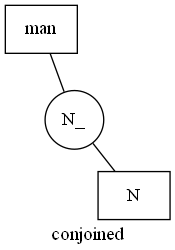

In [4]:
nounFGG = FGG(
    {noun}, # T
    {'X'}, # N
    'S', # S
    {Production('X',noun)} # P
)

conjoined = derivationtree.conjunction(nounFGG)
imgname = str("conjoined")
Visualization().draw(conjoined, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


***
## Inference

FGGLIB also performs inferences. It distinguishes three cases:
1. Finite variable domains, infinite graph language 
2. Finite graph languages
3. inifite graph languages, inifite variable domains

In order to determine which algorithm to use, the library offers methods to check the characteristics of FGG:
- recursive or nonrecursive
- nonliearly recursive or linearly recursive
- nonreentrant
 
### Finite variable domains


In [5]:
from fgglib.fgg.fggsum_product import FGGsum_product
from fgglib.fg.variabledomain import VariableDomain
frag=Fragment()
fragment0 = frag.buildFragment(
     {'v00', 'v01'}, # V
    [('X', {'v00','v01'})], # E
    {'v00'}, # ext
)

fragment1 = frag.buildFragment(
     {'v1', 'v01'}, # V
    [('e1', {'v1','v01'})], # E
    {'v1'}, # ext
)

finiteVariableDomain = FGG({fragment0, fragment1}, # T
    {'S', 'X'}, # N
    {'S'}, # S
    {Production('S', fragment0),
     Production('X', fragment1)} # P
    )

varDomain = VariableDomain(infinite=False)
varDomain.set_content({0.1, 1, 5})
finiteVariableDomain.set_variable_domain('v00',varDomain)
finiteVariableDomain.set_variable_domain('v01',varDomain)
finiteVariableDomain.set_variable_domain('v10',varDomain)
finiteVariableDomain.set_variable_domain('v11',varDomain)

print(finiteVariableDomain.recursive())

False
